In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
df = pd.read_pickle("complete_tokushima.pkl")
df["year"] = df.year.astype(int)
df["month"] = df.month.astype(int)
df["value"] = df.value.astype(float)

In [17]:
eng_pref = """Tokushima City
Naruto City
Komatsushima City
Anan City
Yoshinogawa City
Awa City
Mima City
Miyoshi City
Katsuura Town
Kamikatsu Town
Sanagochi Village
Ishii Town
Kamiyama Town
Naka Town
Mugi Town
Minami Town
Kaiyo Town
Matsushige Town
Kitajima Town
Aizumi Town
Itano Town
Kamiita Town
Tsurugi Town
Higashimiyoshi Town""".split("\n")
a = []
for i in eng_pref:
    b = i.split(" ")[0]
    a.append(b)

In [ ]:
jp_pref = df.pref_flg.unique()
pref_dict = dict(zip(jp_pref,eng_pref))
df.pref.apply(lambda x:pref_dict[x])
df["eng_pref"] = df.pref.apply(lambda x:pref_dict[x])

In [18]:
jp_pref = df.pref_flg.unique()
pref_dict = dict(zip(jp_pref,eng_pref))
df["eng_pref"] = df.pref_flg.apply(lambda x:pref_dict[x])

In [19]:
cnt_data = df[df.types.str.contains("mn_cnt|wn_cnt")]

In [24]:
grouped_data = cnt_data.groupby(["year","month","eng_pref"]).value.sum().reset_index().groupby(["year","eng_pref"]).value.mean().astype(int).reset_index()

In [30]:
grouped_data

,year,eng_pref,value
0,2001,Aizumi Town,30702
1,2001,Anan City,78890
2,2001,Awa City,42237
3,2001,Higashimiyoshi Town,16190
4,2001,Ishii Town,26098
...,...,...,...
475,2020,Naruto City,55541
476,2020,Sanagochi Village,2062
477,2020,Tokushima City,254801
478,2020,Tsurugi Town,7642


In [40]:
grouped_data.pivot_table(index="year",columns="eng_pref",values="value").T.sort_values(2020,ascending=False).T

eng_pref,Tokushima City,Anan City,Naruto City,Yoshinogawa City,Komatsushima City,Aizumi Town,Awa City,Mima City,Ishii Town,Miyoshi City,...,Kamiita Town,Kaiyo Town,Tsurugi Town,Naka Town,Minami Town,Katsuura Town,Kamiyama Town,Mugi Town,Sanagochi Village,Kamikatsu Town
year,,,,,,,,,,,,,,,,,,,,,
2001,267722,78890,64548,46694,42990,30702,42237,36540,26098,36915,...,12962,12175,12961,11775,9169,6689,7664,5719,2986,2103
2002,267447,78856,64444,46519,42869,31150,41961,36309,26210,36230,...,13096,12075,12760,11546,9097,6632,7464,5637,2942,2059
2003,267467,78639,64277,46270,42678,31534,41653,36062,26257,35834,...,13116,11966,12557,11365,8966,6537,7272,5559,2882,2045
2004,267379,78340,63992,46078,42445,31788,41501,35671,26303,35202,...,13150,11895,12332,11201,8865,6462,7097,5457,2828,2018
2005,266846,78186,63525,45846,42184,32151,41229,35142,26211,34510,...,13141,11713,12046,10956,8702,6362,6925,5353,2807,1971
2006,267288,77748,62994,45508,41972,32509,40837,34246,26096,33541,...,13093,11341,11492,10457,8592,6214,6754,5314,2762,1903
2007,266631,77283,62632,45105,41686,32745,40482,33743,26008,32720,...,13049,11153,11237,10173,8433,6086,6513,5204,2721,1863
2008,265474,76810,62187,44691,41325,32865,40057,33337,25927,31935,...,13005,10925,10985,9942,8252,5954,6317,5070,2697,1825
2009,264676,76317,61734,44360,40927,32982,39614,32952,25863,31225,...,12928,10700,10741,9712,8025,5866,6137,4948,2658,1809


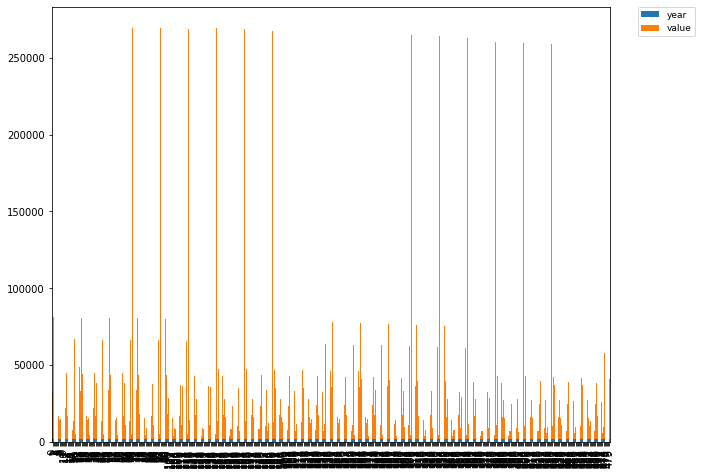

In [26]:
fig, ax = plt.subplots(figsize=(10, 8))

show_data = grouped_data.pivot_table(index="year", columns="eng_pref", values="value", aggfunc="sum")\
                        .T.sort_values(2020, ascending=False).T


show_data.plot(kind="bar", stacked=True, ax=ax)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=9)
plt.show()